In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,r2_score

In [86]:
df = pd.read_csv('fertility.csv')
df.head()

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered


In [87]:
X = df.drop('Diagnosis',axis =1)
y = df['Diagnosis']

X.head()
df.isnull().sum()

Season                                   0
Age                                      0
Childish diseases                        0
Accident or serious trauma               0
Surgical intervention                    0
High fevers in the last year             0
Frequency of alcohol consumption         0
Smoking habit                            0
Number of hours spent sitting per day    0
Diagnosis                                0
dtype: int64

In [88]:
X = pd.get_dummies(X)
X

,Age,Number of hours spent sitting per day,Season_fall,Season_spring,Season_summer,Season_winter,Childish diseases_no,Childish diseases_yes,Accident or serious trauma_no,Accident or serious trauma_yes,...,High fevers in the last year_more than 3 months ago,High fevers in the last year_no,Frequency of alcohol consumption_every day,Frequency of alcohol consumption_hardly ever or never,Frequency of alcohol consumption_once a week,Frequency of alcohol consumption_several times a day,Frequency of alcohol consumption_several times a week,Smoking habit_daily,Smoking habit_never,Smoking habit_occasional
0,30,16,False,True,False,False,True,False,False,True,...,True,False,False,False,True,False,False,False,False,True
1,35,6,False,True,False,False,False,True,True,False,...,True,False,False,False,True,False,False,True,False,False
2,27,9,False,True,False,False,False,True,True,False,...,True,False,False,True,False,False,False,False,True,False
3,32,7,False,True,False,False,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
4,30,9,False,True,False,False,False,True,False,True,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,30,9,False,False,False,True,False,True,True,False,...,True,False,False,True,False,False,False,False,True,False
96,29,9,False,False,False,True,False,True,True,False,...,True,False,False,False,True,False,False,False,False,True
97,30,6,False,False,False,True,False,True,False,True,...,True,False,False,True,False,False,False,False,True,False
98,30,3,False,False,False,True,False,True,True,False,...,True,False,False,True,False,False,False,False,False,True


In [89]:
label = LabelEncoder()
y = label.fit_transform(y)

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 24)

In [91]:
model = LogisticRegression()

In [92]:
model.fit(X_train,y_train)

C:\Users\91620\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [94]:
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)
precision = precision_score(y_test,y_pred)
print(precision_score)
r2 = r2_score(y_test,y_pred)
print(r2)

0.9
<function precision_score at 0x0000019015474AE0>
-0.11111111111111094


In [95]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
k = 3 # Choose the number of neighbors
model = KNeighborsClassifier(n_neighbors=k) 
# Train the model
model.fit(X_train, y_train)
#y_train,y_test
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
precision = precision_score(y_pred,y_test)
print(accuracy,precision)

0.85 0.9444444444444444


In [112]:
#some insights 
df
crosstab= pd.crosstab(df['Smoking habit'],df['Diagnosis'])
crosstab
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='Diagnosis', ylabel='Smoking habit'>

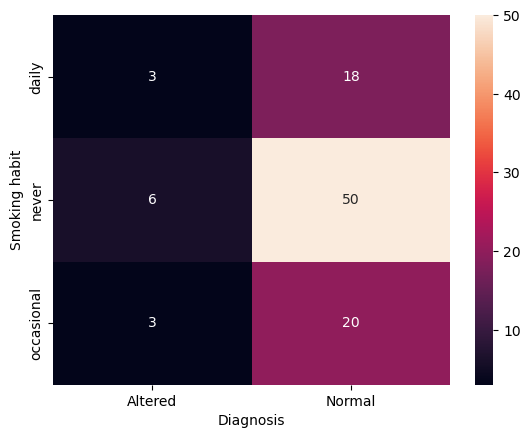

In [118]:
sns.heatmap(crosstab,annot=True)

In [128]:
df

,Season,Age,Childish diseases,Accident or serious trauma,Surgical intervention,High fevers in the last year,Frequency of alcohol consumption,Smoking habit,Number of hours spent sitting per day,Diagnosis
0,spring,30,no,yes,yes,more than 3 months ago,once a week,occasional,16,Normal
1,spring,35,yes,no,yes,more than 3 months ago,once a week,daily,6,Altered
2,spring,27,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
3,spring,32,no,yes,yes,more than 3 months ago,hardly ever or never,never,7,Normal
4,spring,30,yes,yes,no,more than 3 months ago,once a week,never,9,Altered
...,...,...,...,...,...,...,...,...,...,...
95,winter,30,yes,no,no,more than 3 months ago,hardly ever or never,never,9,Normal
96,winter,29,yes,no,no,more than 3 months ago,once a week,occasional,9,Normal
97,winter,30,yes,yes,yes,more than 3 months ago,hardly ever or never,never,6,Normal
98,winter,30,yes,no,yes,more than 3 months ago,hardly ever or never,occasional,3,Normal
